# SET UP

In [1]:
import pandas as pd
import seaborn as sns
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
from scipy.stats import iqr
import umap
import functions

In [2]:
ct_to_col = {
    'pre_CD8_act': '#ff7f0e', 
    'pre_CD8_ex': '#d62728', 
    'pre_CD8_mem': '#8c564b',
    'pre_CD8_Naive': '#1f77b4', 
    'pre_CD8_eff': '#2ca02c',  
    'pre_CD8_ex_act': '#9467bd'
}

# DATA PREPARATION

## MODELS SIMULATION RESULTS

,biomass_maintenance,objective_value,percent_ov
scc_su010_pre_rep1_TGACAACCACGACTCG,96.848548,21808.987594,7.883245
scc_su013_pre_CTGAAACGTCCTCTTG,109.875404,155606.009550,56.246552
scc_su010_pre_rep2_GGAGCAATCCCGGATG,175.842175,100379.526350,36.283960
scc_su010_pre_rep1_GGGAATGAGAGACGAA,130.967837,113029.444937,40.856497
scc_su014_pre_CCTTTCTAGGTGCAAC,181.711504,95777.262338,34.620390
...,...,...,...
scc_su010_pre_rep2_ACTTACTCACCGTTGG,185.379322,82176.908280,29.704301
scc_su013_pre_CGATGGCAGGCGTACA,105.332784,34355.165161,12.418284
scc_su013_pre_AGCTTGACACAGTCGC,118.606137,47026.790985,16.998668
scc_su010_pre_rep1_ATCCACCGTTACAGAA,117.025329,42317.983499,15.296586


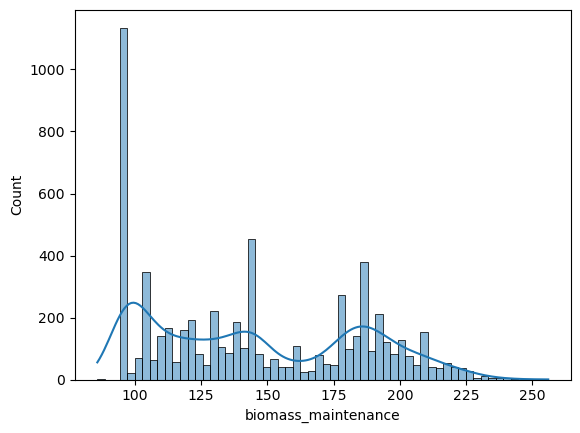

In [3]:
r_models = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/TITC_pre/pfba_rmodels_pre.csv", index_col = 0)
sns.histplot(r_models, x = "biomass_maintenance", bins = 60, kde = True)
r_models

## FLUXOMES DATAFRAME

In [4]:
fluxes_df = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/TITC_pre/pfba_fluxes_pre.csv", index_col = 0)
fluxes_df = fluxes_df.fillna(0.0)
fluxes_df

,10FTHFtm,2HBO,2HBt2,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34HPLFM,3DSPHR,...,r0055,r2449,FAOXC8C6x,r1935,AHCYSte,EX_ahcys[e],5HLTDL,r0403,34DHPHEt,34DHPHELAT1tc
scc_su010_pre_rep1_TGACAACCACGACTCG,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,-7.404053e-13,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su013_pre_CTGAAACGTCCTCTTG,-1.473353e-29,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_pre_rep2_GGAGCAATCCCGGATG,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_pre_rep1_GGGAATGAGAGACGAA,0.000000e+00,9.315430e+02,0.000000e+00,0.0,0.0,4.730165e+00,4.730165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su014_pre_CCTTTCTAGGTGCAAC,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scc_su010_pre_rep2_ACTTACTCACCGTTGG,0.000000e+00,-6.536660e+01,-6.536660e+01,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su013_pre_CGATGGCAGGCGTACA,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su013_pre_AGCTTGACACAGTCGC,0.000000e+00,-1.865779e-13,-1.865779e-13,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_pre_rep1_ATCCACCGTTACAGAA,0.000000e+00,9.430617e-14,9.430617e-14,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FLUXES TRANSFORMATION

In [5]:
t_fluxes_df = fluxes_df.applymap(functions.flux_transformer)

## REACTIONS FILTERING

In [6]:
rx = pd.DataFrame(columns=['Reaction', 'IQR'])
for col in t_fluxes_df.columns:
    IQR = iqr(t_fluxes_df[col])
    if IQR != 0:
        rx = pd.concat([rx, pd.DataFrame({'Reaction': [col], 'IQR': [IQR]})], ignore_index = True)

ft_fluxes_df = t_fluxes_df[rx['Reaction']]
rx

,Reaction,IQR
0,ACACT1rm,7.842608e+00
1,ACACT1x,5.463803e+00
2,ALCD21_L,7.375218e+00
3,ALR2,7.321640e+00
4,ALR3,7.375218e+00
...,...,...
241,r2098,1.907918e-13
242,ACACt2,2.775558e-16
243,EX_cgly[e],3.283252e+00
244,HMR_0155,9.538746e+00


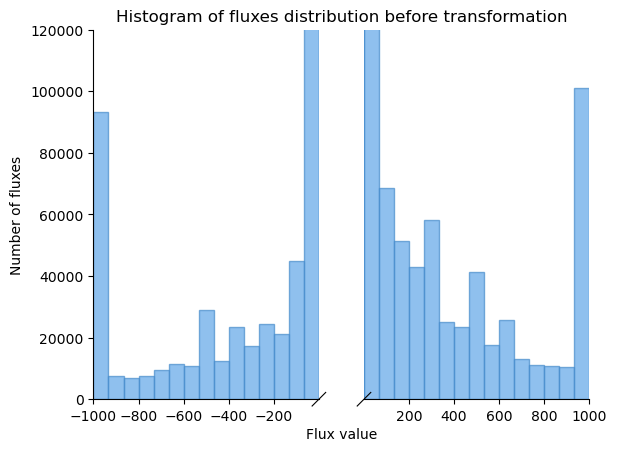

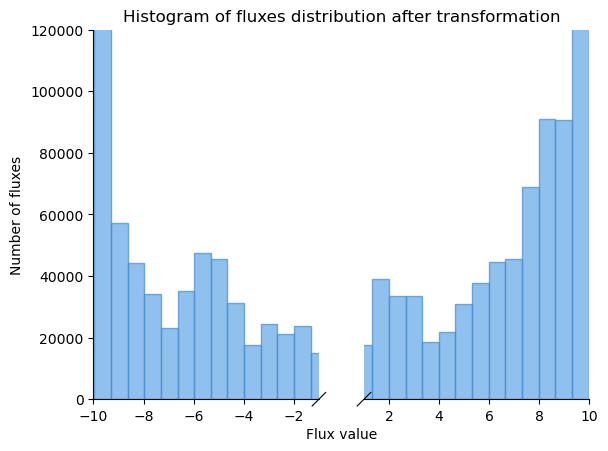

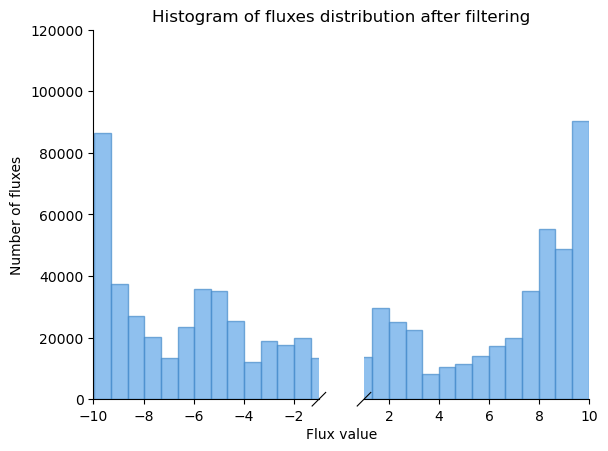

In [7]:
f_array = fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-1000, -1), (1, 1000)))
bax.hist(f_array[~((f_array > -1) & (f_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution before transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

ft_array = t_fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-10, -1), (1, 10)))
bax.hist(ft_array[~((ft_array > -1) & (ft_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution after transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

fft_array = ft_fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-10, -1), (1, 10)))
bax.hist(fft_array[~((fft_array > -1) & (fft_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution after filtering")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

# RESULTS VISUALIZATION

## COLOR MAPPING

In [8]:
c_labs = pd.read_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/pre_CD8/clabs_titc.csv')
c_labs['Cell_Name'] = c_labs['Cell_Name'].str.replace('.', '_')
d_clabs = {type: group['Cell_Name'].tolist() for type, group in c_labs.groupby('Cluster_Label')}     
colors = [next((ct_to_col[type] for type, cells in d_clabs.items() if cell in cells)) for cell in fluxes_df.index]

In [9]:
l = []
l_labs = []

for key, value in d_clabs.items():
    l.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = ct_to_col[key], markersize = 10))
    l_labs.append(key)

## UMAP PROJECTION

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


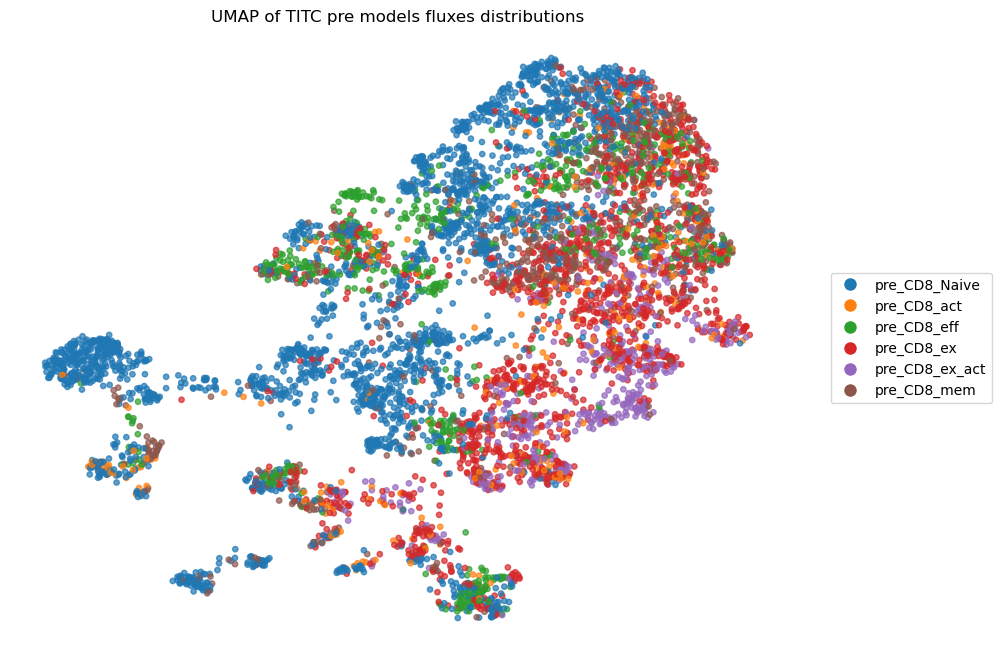

In [10]:
reducer = umap.UMAP(n_neighbors = 25, min_dist = 0.5, random_state = 42)
embedding = reducer.fit_transform(ft_fluxes_df)

plt.figure(figsize = (10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = colors, s = 15, alpha = .7) 
plt.legend(l, l_labs, bbox_to_anchor = (1.05, 0.5), loc = 'center left')
plt.title('UMAP of TITC pre models fluxes distributions')
plt.axis('off') 
plt.savefig("umapf_pre.svg")
plt.show()

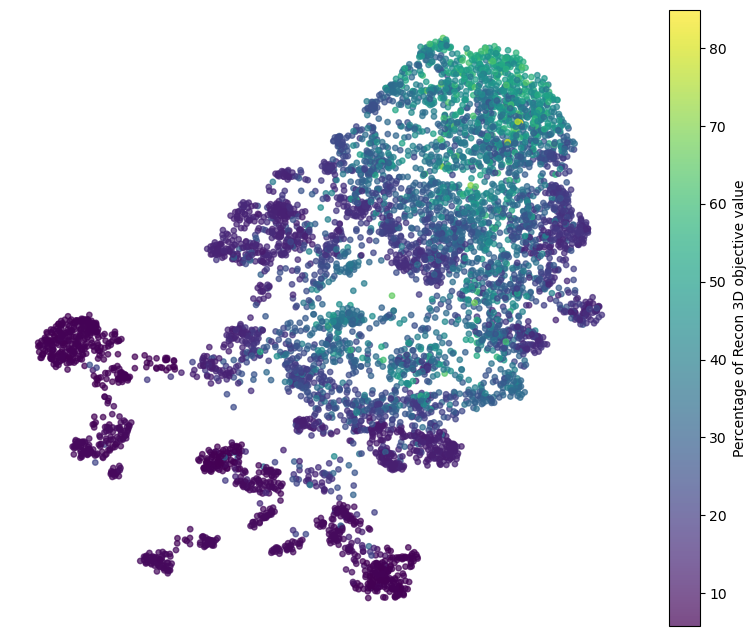

In [11]:
fd_ov = dict(zip(r_models.index, r_models['percent_ov']))

plt.figure(figsize = (10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = [fd_ov.get(index, -1) for index in t_fluxes_df.index], cmap = "viridis", s = 15, alpha = .7)
plt.colorbar(label = 'Percentage of Recon 3D objective value')  
plt.axis('off') 
plt.show()